## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_pharma_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
merged_pharma_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice.
mice = merged_pharma_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_duplicate_mouse = merged_pharma_data.loc[merged_pharma_data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
# Optional: Get all the data for the duplicate mouse ID. 
data_for_duplicate_mouse = merged_pharma_data.loc[merged_pharma_data["Mouse ID"] == 'g989']
data_for_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_pharma_data[merged_pharma_data["Mouse ID"].isin(data_for_duplicate_mouse) == False]
cleaned_df

cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [34]:
# Checking the number of mice in the clean DataFrame.
mice_clean=cleaned_df["Mouse ID"].value_counts()
number_of_mice_clean=len(mice_clean)
number_of_mice_clean

249

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# GroupBy variable to create drug_regimen_summary_table
drug_regimen_gb = cleaned_df.groupby(["Drug Regimen"])

# Calculations for drug_regimen_summary_table
drug_regimen_mean = drug_regimen_gb["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_gb["Tumor Volume (mm3)"].median()
drug_regimen_variance = drug_regimen_gb["Tumor Volume (mm3)"].var()
drug_regimen_stdev = drug_regimen_gb["Tumor Volume (mm3)"].std()
drug_regimen_SEM = drug_regimen_gb["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Creating DataFrame for drug_regimen_summary_table with drug_regimen calculation 
drug_regimen_summary_table = pd.DataFrame({"Mean": drug_regimen_mean, "Median":drug_regimen_median, 
                                           "Variance": drug_regimen_variance, "Standard Dev": drug_regimen_stdev, 
                                           "SEM": drug_regimen_SEM})

drug_regimen_summary_table


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_summary = cleaned_df.groupby("Drug Regimen")
groupby_drug_regimen_summary_table= groupby_summary.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
groupby_drug_regimen_summary_table.head()
# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

<IPython.core.display.Javascript object>


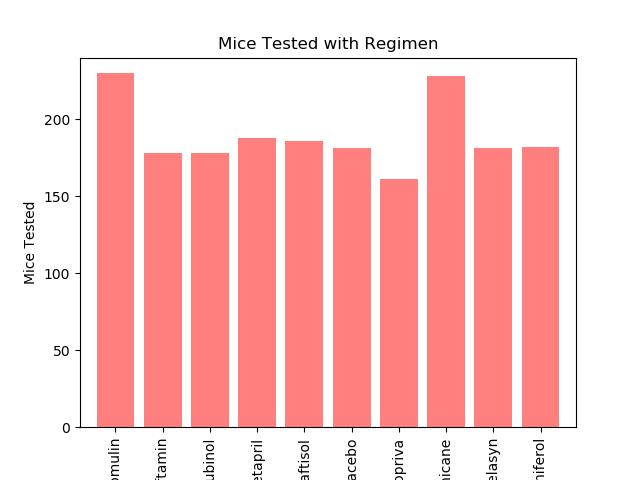

Text(0, 0.5, 'Mice Tested')

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_count = [230,178,178,188,186,181,161,228,181,182]

drug_regimen = np.arange(len(regimen_datapoints))

plt.bar(drug_regimen, mice_count, color='r', alpha=0.5, align="center")
drug_tick_locations = [value for value in drug_regimen]
plt.xticks(drug_tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo",
                                 "Propriva","Ramicane","Stelasyn", "Zoniferol"],rotation= "vertical")

plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0, max(mice_count)+10)

plt.title("Mice Tested with Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")



<IPython.core.display.Javascript object>


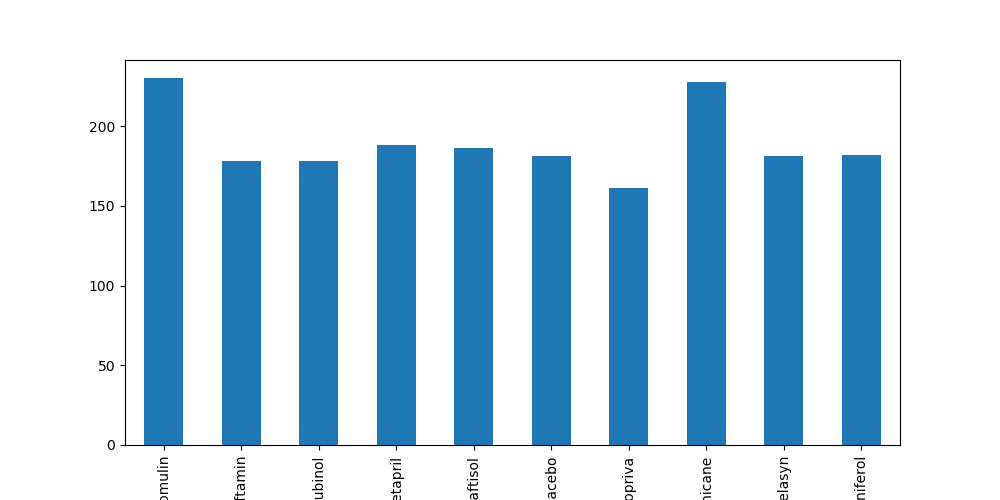

In [12]:
# GroupBy variable to count the number of mice per drug regimen
regimen_datapoints = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_datapoints.plot(kind = "bar", figsize=(10,5))


In [14]:
# Generate a summary table showing the distribution of female versus male mice
groupby_sex = cleaned_df.groupby(["Mouse ID","Sex"])

mouse_sex_df = pd.DataFrame(groupby_sex.size())

mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
mouse_sex.columns = ["Sex Count"]

mouse_sex["Sex Percentage"] = (100*(mouse_sex["Sex Count"]/mouse_sex["Sex Count"].sum()))

mouse_sex["Sex Percentage"] = mouse_sex["Sex Percentage"]

mouse_sex

,Sex Count,Sex Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


<IPython.core.display.Javascript object>


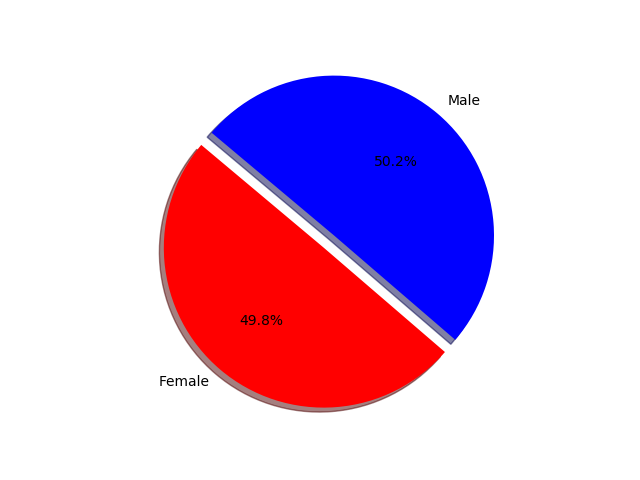

(-1.1879383453817904,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ["red", "blue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


<IPython.core.display.Javascript object>


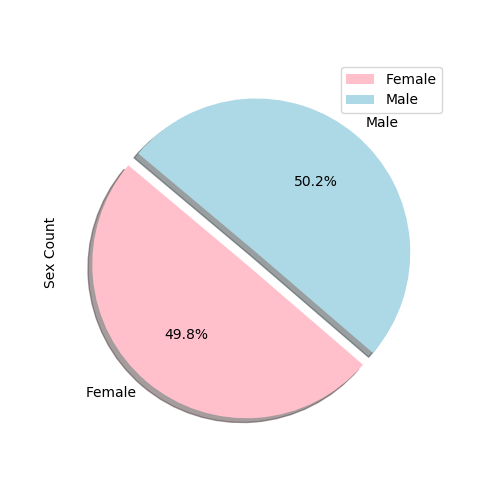

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["pink", "lightblue"]
explode = (0.1, 0)
plot = mouse_sex.plot.pie(y="Sex Count",figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = cleaned_df[cleaned_df.isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])]
final_tumor_vol = final_tumor_vol.sort_values(["Timepoint"], ascending = True)
final_tumor_vol

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint =cleaned_df.groupby(["Mouse ID"]).max()["Timepoint"]
greatest_timepoint=greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(cleaned_df, greatest_timepoint, on = "Mouse ID", how = "left")
final_tumor_vol

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,45
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1891,x773,45,58.634971,4,Placebo,Female,21,30,45


In [45]:
drug_regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_vol_list = []

# Put treatments into a list for for loop (and later for plot labels)
for drug in drug_regimen:
    #variable to solate drug regimen and populate 
    final_tumor_vol=cleaned_df.loc[cleaned_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    #put final_tumor_vol into tumor_vol_list
    tumor_vol_list.append(final_tumor_vol)
    #quartiles
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    #iqr
    iqr = upperq-lowerq
    #outlier bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    #all potential outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


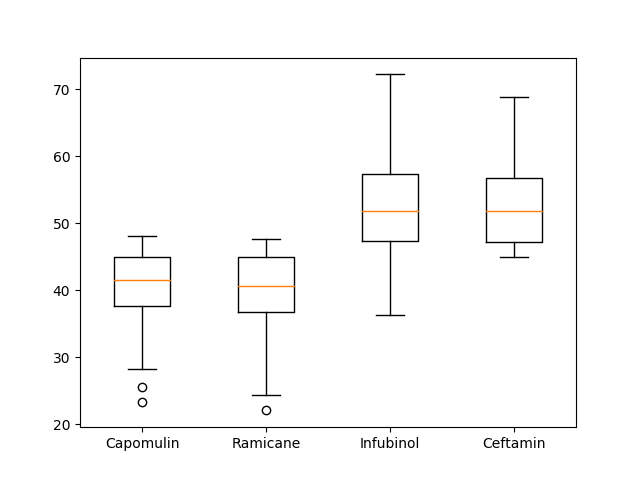

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels= drug_regimen,)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merged_pharma_data.loc[merged_pharma_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

mouse_line = capomulin_df.loc[capomulin_df["Mouse ID"] == "r944",:]
mouse_line.head()

x_axis_time_point = mouse_line["Timepoint"]
tumor_vol = mouse_line["Tumor Volume (mm3)"]

plt.title("Tumor Volume for Mice treated with Capomulin")
plt.plot(x_axis_time_point, tumor_vol, linewidth = 3, markersize = 10)
plt.xlabel("Time Point by Day")
plt.ylabel("Tumor Volume Size (mm3)")

plt.savefig("linechart")
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

average_tumor_vol = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_tumor_vol.head()



# Set the 'Mouse ID' as our index
average_tumor_vol = average_tumor_vol.set_index('Mouse ID')

average_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,5),
              title="Weight Vs. Average Tumor Volume")
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = average_tumor_vol.iloc[:,0]
avg_tumor_vol = average_tumor_vol.iloc[:,1]
correlation = st.pearsonr(mice_weight,avg_tumor_vol)
print(f"The correlation between mouse weight (g) and Tumor Volume (mm3) is {round(correlation[0],2)}")

x_values = average_tumor_vol["Weight (g)"]
y_values = average_tumor_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()